# Telecom Churn Case Study

## Problem Statement

### Business problem overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition. 

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.



### Understanding and defining churn

There are two main models of payment in the telecom industry - postpaid (customers pay a monthly/annual bill after using the services) and prepaid (customers pay/recharge with a certain amount in advance and then use the services).
 

In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of ch


 

However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the servicesain).

 

Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.  Also, prepaid is the most common model in India and Southeast Asia, while postpaid is more common in Europe in Noh America.

 

This project is based on the Indian and Southeast Asian market.

### Understanding the business objective and the data

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively.


The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

### Understanding customer behaviour during churn

Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :


The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this ase.

 

In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

## Importing the Data 

In [12]:
# Supress unnecessary warnings

import warnings
warnings.filterwarnings("ignore")

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

%matplotlib inline

In [14]:
# Read the dataset

churn_data = pd.read_csv("C:/Users/bebal/Downloads/IIITB-Data Science Program/telecom_churn_data.csv")
churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [15]:
churn_data.shape

(99999, 226)

In [16]:
churn_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [17]:
churn_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [18]:
# Converting date column in datetime format

date_col = churn_data.select_dtypes(include='object')

for i in date_col.columns:
    churn_data[i] = pd.to_datetime(churn_data[i])

In [19]:
churn_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype         
---   ------                    -----         
 0    mobile_number             int64         
 1    circle_id                 int64         
 2    loc_og_t2o_mou            float64       
 3    std_og_t2o_mou            float64       
 4    loc_ic_t2o_mou            float64       
 5    last_date_of_month_6      datetime64[ns]
 6    last_date_of_month_7      datetime64[ns]
 7    last_date_of_month_8      datetime64[ns]
 8    last_date_of_month_9      datetime64[ns]
 9    arpu_6                    float64       
 10   arpu_7                    float64       
 11   arpu_8                    float64       
 12   arpu_9                    float64       
 13   onnet_mou_6               float64       
 14   onnet_mou_7               float64       
 15   onnet_mou_8               float64       
 16   onnet_mou_9               float64     

## Handeling Missing values

In [21]:
# Check the number of null values again

round(100*(churn_data.isnull().sum().sort_values(ascending=False)/len(churn_data)),2)

arpu_3g_6                   74.85
night_pck_user_6            74.85
total_rech_data_6           74.85
arpu_2g_6                   74.85
max_rech_data_6             74.85
fb_user_6                   74.85
av_rech_amt_data_6          74.85
date_of_last_rech_data_6    74.85
count_rech_2g_6             74.85
count_rech_3g_6             74.85
date_of_last_rech_data_7    74.43
total_rech_data_7           74.43
fb_user_7                   74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
count_rech_2g_7             74.43
av_rech_amt_data_7          74.43
arpu_2g_7                   74.43
count_rech_3g_7             74.43
arpu_3g_7                   74.43
total_rech_data_9           74.08
count_rech_3g_9             74.08
fb_user_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
date_of_last_rech_data_9    74.08
night_pck_user_9            74.08
arpu_2g_9                   74.08
count_rech_2g_9             74.08
av_rech_amt_da

In [22]:
# Checking the unique columns values and drop such columns with its value 1

unique_col = []

for i in churn_data.columns:
    if churn_data[i].nunique() == 1:
        unique_col.append(i)
    else:
        print("Not Present")
churn_data.drop(unique_col, axis=1, inplace=True)
print('The dropped columns are: ', unique_col)

Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not Present
Not 

#### Handeling missing values for "data recharge" attributes for all the months.

In [24]:
# Handeling missing values for total_rech_data & max_rech_data for 6,7,8 and 9 months

for i in range(len(churn_data)):
    # Handling 'total_rech_data', 'max_rech_data' and for month 6
    if pd.isnull((churn_data['total_rech_data_6'][i]) and (churn_data['max_rech_data_6'][i])):
        if pd.isnull(churn_data['date_of_last_rech_data_6'][i]):
            churn_data['total_rech_data_6']=0
            churn_data['max_rech_data_6']=0

    # Handling 'total_rech_data', 'max_rech_data' and for month 7
    if pd.isnull((churn_data['total_rech_data_7'][i]) and (churn_data['max_rech_data_7'][i])):
        if pd.isnull(churn_data['date_of_last_rech_data_7'][i]):
            churn_data['total_rech_data_7']=0
            churn_data['max_rech_data_7']=0

    # Handling 'total_rech_data', 'max_rech_data' and for month 8
    if pd.isnull((churn_data['total_rech_data_8'][i]) and (churn_data['max_rech_data_8'][i])):
        if pd.isnull(churn_data['date_of_last_rech_data_8'][i]):
            churn_data['total_rech_data_8']=0
            churn_data['max_rech_data_8']=0

    # Handling 'total_rech_data', 'max_rech_data' and for month 9
    if pd.isnull((churn_data['total_rech_data_9'][i]) and (churn_data['max_rech_data_9'][i])):
        if pd.isnull(churn_data['date_of_last_rech_data_9'][i]):
            churn_data['total_rech_data_9']=0
            churn_data['max_rech_data_9']=0

print("The total_rech_data & max_rech_data attributes are imputed to zero")

The total_rech_data & max_rech_data attributes are imputed to zero


#### Handeling the missing values for count_rech_2g and count_rech_3g

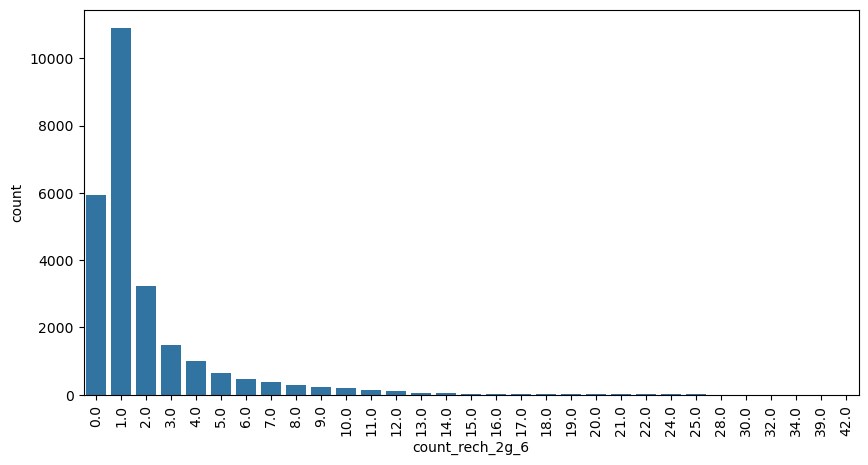

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(x='count_rech_2g_6', data=churn_data)
plt.xticks(rotation=90)
plt.show()

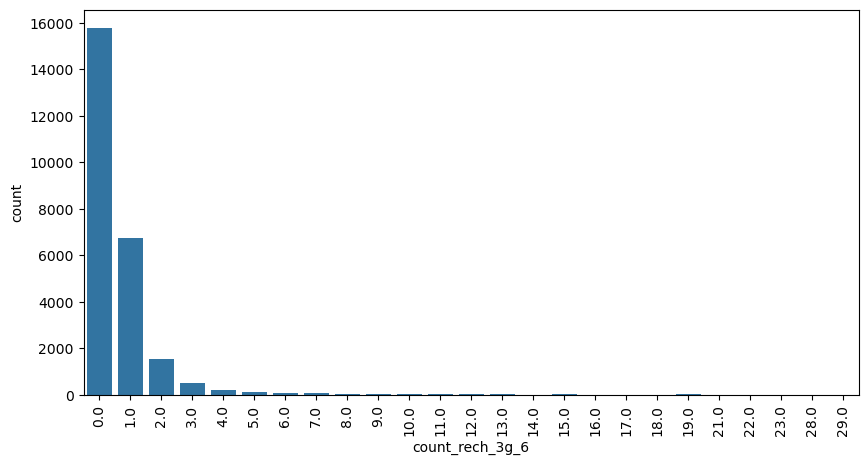

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(x='count_rech_3g_6', data=churn_data)
plt.xticks(rotation=90)
plt.show()

**We can see that from the above plots we can conclude that for count_rech_2g and count_rech_3g for 6,7,8 and 9 months respectively it has a very high multicollinearity however, to reduce the multicollinearity we should drop the columns.**

In [29]:
# Dropping the columns for count_rech_2g and count_rech_3g for 6,7,8 and 9 months

churn_data.drop(['count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_2g_9',
                'count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','count_rech_3g_9'], axis=1, inplace=True)

#### Handeling missing values for arpu_3g and arpu_2g 

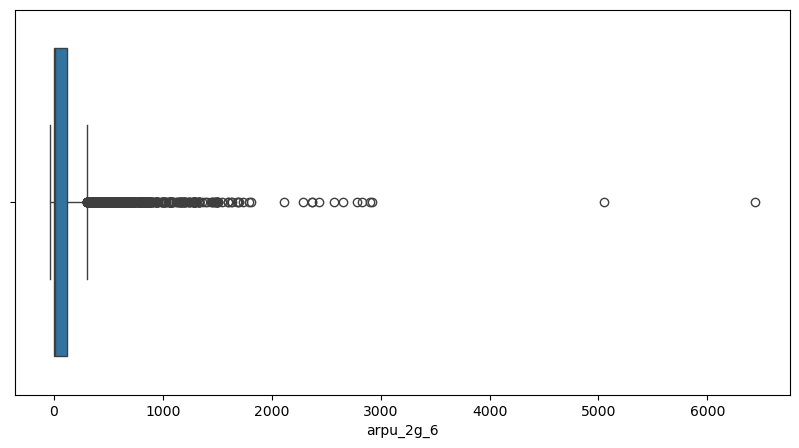

In [31]:
# Checking for multicollinearity using a boxplot

plt.figure(figsize=(10,5))
sns.boxplot(x='arpu_2g_6', data=churn_data)
plt.show()

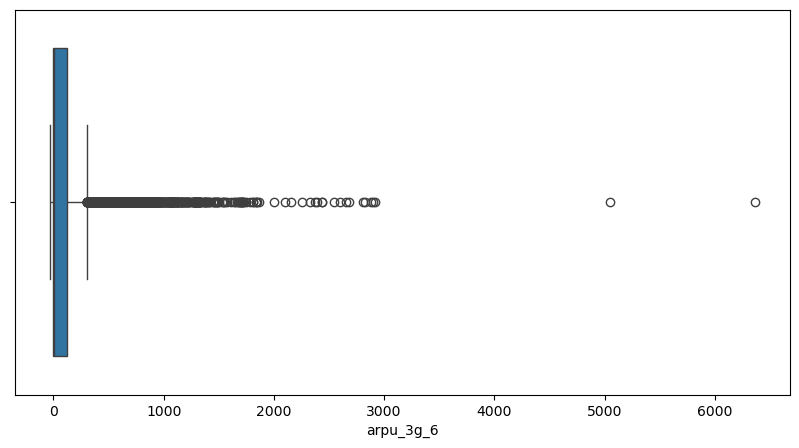

In [32]:
plt.figure(figsize=(10,5))
sns.boxplot(x='arpu_3g_6', data=churn_data)
plt.show()

**From the above boxplot we can observe that there are many outliers for arpu_2g and arpu_3g for 6,7,8 and 9 months respectively hence we can drop the arpu_2g and arpu_3g columns for 6,7,8 and 9.**

In [34]:
# Dropping the columns for arpu_2g and arpu_3g for 6,7,8 and 9 months

churn_data.drop(['arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9',
                'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_3g_9'], axis=1, inplace=True)

In [35]:
# Checking the shape of the data

churn_data.shape

(99999, 194)

#### Handeling missing values with high value percentage

The column ***fb_user*** and ***night_pck_user*** have 74% of missing values so we can drop the columns

In [38]:
# Dropping the columns for arpu_2g and arpu_3g for 6,7,8 and 9 months

churn_data.drop(['fb_user_6','fb_user_7','fb_user_8','fb_user_9',
                'night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9'], axis=1, inplace=True)

#### Handling the missing values for the attributes av_rech_amt_data for month 6,7,8 and 9

In [40]:
# Imputing this "av_rech_amt_data" attribute as 0 for 6,7,8 and 9 months

for i in range(len(churn_data)):
    # Handling av_rech_amt_data for month 6
    if (pd.isnull(churn_data['av_rech_amt_data_6'][i]) and (churn_data['total_rech_data_6'][i]==0)):
        churn_data['av_rech_amt_data_6']=0

    # Handling av_rech_amt_data for month 7
    if (pd.isnull(churn_data['av_rech_amt_data_7'][i]) and (churn_data['total_rech_data_7'][i]==0)):
        churn_data['av_rech_amt_data_7']=0

    # Handling av_rech_amt_data for month 8
    if (pd.isnull(churn_data['av_rech_amt_data_8'][i]) and (churn_data['total_rech_data_8'][i]==0)):
        churn_data['av_rech_amt_data_8']=0

    # Handling av_rech_amt_data for month 9
    if (pd.isnull(churn_data['av_rech_amt_data_9'][i]) and (churn_data['total_rech_data_9'][i]==0)):
        churn_data['av_rech_amt_data_9']=0

print("The av_rech_amt_data attribute is imputed to zero")

The av_rech_amt_data attribute is imputed to zero


In [41]:
# Checking the missing values again

round(100*(churn_data.isnull().sum().sort_values(ascending=False)/len(churn_data)),2)

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_9    74.08
date_of_last_rech_data_8    73.66
og_others_9                  7.75
loc_og_t2f_mou_9             7.75
loc_og_t2t_mou_9             7.75
loc_ic_t2f_mou_9             7.75
std_ic_mou_9                 7.75
std_og_t2f_mou_9             7.75
loc_og_t2m_mou_9             7.75
loc_ic_mou_9                 7.75
std_og_t2m_mou_9             7.75
std_ic_t2f_mou_9             7.75
std_ic_t2t_mou_9             7.75
loc_og_t2c_mou_9             7.75
std_ic_t2m_mou_9             7.75
std_og_t2t_mou_9             7.75
loc_og_mou_9                 7.75
std_og_mou_9                 7.75
spl_ic_mou_9                 7.75
roam_og_mou_9                7.75
spl_og_mou_9                 7.75
loc_ic_t2t_mou_9             7.75
isd_og_mou_9                 7.75
roam_ic_mou_9                7.75
loc_ic_t2m_mou_9             7.75
isd_ic_mou_9                 7.75
onnet_mou_9                  7.75
ic_others_9   

#### We can also drop the date_of_last_rech_data as they are no need for the visualisation.

In [43]:
# Dropping the columns for date_of_last_rech_data for 6,7,8 and 9 months

churn_data.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9'], axis=1, inplace=True)

In [44]:
# Dropping the columns for date_of_last_rech for 6,7,8 and 9 months

churn_data.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9'], axis=1, inplace=True)

In [45]:
# Checking the missing values again

round(100*(churn_data.isnull().sum().sort_values(ascending=False)/len(churn_data)),2)

std_og_t2t_mou_9      7.75
roam_ic_mou_9         7.75
loc_ic_mou_9          7.75
loc_og_t2c_mou_9      7.75
std_og_t2m_mou_9      7.75
loc_og_t2f_mou_9      7.75
std_og_t2f_mou_9      7.75
std_og_mou_9          7.75
loc_og_t2m_mou_9      7.75
std_ic_t2f_mou_9      7.75
spl_ic_mou_9          7.75
loc_og_t2t_mou_9      7.75
isd_og_mou_9          7.75
std_ic_mou_9          7.75
spl_og_mou_9          7.75
og_others_9           7.75
roam_og_mou_9         7.75
std_ic_t2m_mou_9      7.75
isd_ic_mou_9          7.75
ic_others_9           7.75
loc_ic_t2f_mou_9      7.75
loc_ic_t2m_mou_9      7.75
onnet_mou_9           7.75
std_ic_t2t_mou_9      7.75
loc_og_mou_9          7.75
loc_ic_t2t_mou_9      7.75
offnet_mou_9          7.75
isd_og_mou_8          5.38
std_ic_t2f_mou_8      5.38
og_others_8           5.38
std_og_mou_8          5.38
spl_og_mou_8          5.38
std_ic_t2t_mou_8      5.38
std_og_t2f_mou_8      5.38
loc_ic_t2f_mou_8      5.38
std_og_t2m_mou_8      5.38
loc_ic_t2t_mou_8      5.38
s

In [46]:
churn_data.shape

(99999, 178)

**Now as we have clear the null values for High value customers now we have to filter out the reamining null values.**

#### Filtering the High Value Customer from Good Phase at 70th percentile

In [49]:
# Calculating the total recharge amount done for data alone
churn_data['total_rech_amt_data_6']=churn_data['av_rech_amt_data_6'] * churn_data['total_rech_data_6']
churn_data['total_rech_amt_data_7']=churn_data['av_rech_amt_data_7'] * churn_data['total_rech_data_7']

# Calculating the overall recharge amount 
churn_data['overall_rech_amt_6'] = churn_data['total_rech_amt_data_6'] + churn_data['total_rech_amt_6']
churn_data['overall_rech_amt_7'] = churn_data['total_rech_amt_data_7'] + churn_data['total_rech_amt_7']


# Calculating the average recharge done by the customer in 6 and 7 months
churn_data['avg_rech_amt_6_7'] = (churn_data['overall_rech_amt_6']+churn_data['overall_rech_amt_7'])/2

# Finding the 70th percentile for the overall high values cusotmers
cut_off = churn_data['avg_rech_amt_6_7'].quantile(0.70)
print('The 70th percentile for the high value customer is: ', cut_off)

# Filtering the data to the top 30% considered as High Value Customer
churn_data = churn_data[churn_data['avg_rech_amt_6_7'] >= cut_off]

The 70th percentile for the high value customer is:  368.5


In [50]:
churn_data.shape

(30011, 183)

**Now we have 30k rows after filtering all the high value customers from a good phase**

In [52]:
# Checking the missing values again

round(100*(churn_data.isnull().sum().sort_values(ascending=False)/len(churn_data)),2)

loc_ic_t2f_mou_9         5.68
spl_og_mou_9             5.68
loc_og_t2m_mou_9         5.68
loc_og_t2f_mou_9         5.68
loc_ic_t2t_mou_9         5.68
isd_og_mou_9             5.68
loc_og_t2t_mou_9         5.68
loc_ic_t2m_mou_9         5.68
std_og_t2t_mou_9         5.68
roam_og_mou_9            5.68
std_og_mou_9             5.68
loc_ic_mou_9             5.68
std_ic_t2t_mou_9         5.68
roam_ic_mou_9            5.68
loc_og_t2c_mou_9         5.68
std_ic_t2m_mou_9         5.68
offnet_mou_9             5.68
std_ic_t2f_mou_9         5.68
std_og_t2f_mou_9         5.68
std_ic_mou_9             5.68
onnet_mou_9              5.68
spl_ic_mou_9             5.68
loc_og_mou_9             5.68
isd_ic_mou_9             5.68
std_og_t2m_mou_9         5.68
ic_others_9              5.68
og_others_9              5.68
std_og_mou_8             3.13
isd_og_mou_8             3.13
std_og_t2f_mou_8         3.13
std_ic_t2t_mou_8         3.13
og_others_8              3.13
loc_ic_t2t_mou_8         3.13
loc_ic_t2m

In [53]:
num_col = churn_data.select_dtypes(include=['int64','float64']).columns.tolist()

#### Imputing the remaning values using KNN Imputer

In [55]:
# Imputing the remaning values using KNN Imputer

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler 

# Calling the scaler funtion
scaler = MinMaxScaler()

# Scaling and transforming the features 
churn_data[num_col] = scaler.fit_transform(churn_data[num_col])

# Calling the KNN Imputer
KNN = KNNImputer(n_neighbors=3)

# Imputing the NaN values using KNN Imputer
churn_data_KNN = pd.DataFrame(KNN.fit_transform(churn_data[num_col]))
churn_data_KNN.columns = churn_data[num_col].columns

In [56]:
# Checking the null values after imputation
churn_data_KNN.isnull().sum().sum()

0

**Now the values have imputed by using Knn alorithm hence we can convert the scaling features back to its original from**

In [58]:
# Converting scaled features to its original form

churn_data[num_col] = scaler.inverse_transform(churn_data_KNN)

churn_data.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7
7,7.000702e+09,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,105.19,453.43,567.16,325.91,230.436667,16.23,33.49,31.64,10.023333,23.74,12.59,38.06,12.263333,51.39,31.38,40.28,103.666667,308.63,447.38,162.28,184.556667,62.13,55.14,53.23,13.906667,0.0,0.0,0.00,0.0,422.16,533.91,255.79,302.136667,4.30,23.29,12.01,0.00,49.89,31.76,49.14,14.876667,6.66,20.08,16.68,0.00,60.86,75.14,77.84,14.876667,0.0,0.18,10.01,0.943333,4.50,0.00,6.50,5.403333,0.00,0.0,0.0,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31,94.92,217.56,221.49,121.19,133.513333,152.16,101.46,39.53,15.393333,427.88,355.23,188.04,243.836667,36.89,11.83,30.39,0.62,91.44,126.99,141.33,44.18,52.19,34.24,22.21,0.543333,180.54,173.08,193.94,45.346667,626.46,558.04,428.74,0.00,0.21,0.0,0.0,0.0,2.06,14.53,31.59,0.946667,15.74,15.19,15.14,0.00,5.0,5.0,7.0,3.0,1580.0,790.0,3638.0,0.0,1580.0,790.0,1580.0,0.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,0.0,0.0,0.0,1580.0,790.0,1185.0
8,7.001525e+09,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.710000,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.000000,297.13,217.59,12.49,26.130000,80.96,70.58,50.54,34.580000

In [59]:
# Checking the missing values again

round(100*(churn_data.isnull().sum().sort_values(ascending=False)/len(churn_data)),2)

mobile_number            0.0
isd_ic_mou_8             0.0
ic_others_6              0.0
ic_others_7              0.0
ic_others_8              0.0
ic_others_9              0.0
total_rech_num_6         0.0
total_rech_num_7         0.0
total_rech_num_8         0.0
total_rech_num_9         0.0
total_rech_amt_6         0.0
total_rech_amt_7         0.0
total_rech_amt_8         0.0
total_rech_amt_9         0.0
max_rech_amt_6           0.0
max_rech_amt_7           0.0
max_rech_amt_8           0.0
max_rech_amt_9           0.0
last_day_rch_amt_6       0.0
last_day_rch_amt_7       0.0
last_day_rch_amt_8       0.0
isd_ic_mou_9             0.0
isd_ic_mou_7             0.0
total_rech_data_6        0.0
isd_ic_mou_6             0.0
std_ic_t2m_mou_7         0.0
std_ic_t2m_mou_8         0.0
std_ic_t2m_mou_9         0.0
std_ic_t2f_mou_6         0.0
std_ic_t2f_mou_7         0.0
std_ic_t2f_mou_8         0.0
std_ic_t2f_mou_9         0.0
std_ic_mou_6             0.0
std_ic_mou_7             0.0
std_ic_mou_8  

## Defining Churn Varaiables

**The attributes we need to use for tag churners are:
total_ic_mou_9, 
total_og_mou_9, 
vol_2g_mb_9, vol_3g_mb_9**

In [62]:
churn_col = ['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']
churn_data[churn_col].info()

<class 'pandas.core.frame.DataFrame'>
Index: 30011 entries, 7 to 99997
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_ic_mou_9  30011 non-null  float64
 1   total_og_mou_9  30011 non-null  float64
 2   vol_2g_mb_9     30011 non-null  float64
 3   vol_3g_mb_9     30011 non-null  float64
dtypes: float64(4)
memory usage: 1.1 MB


In [63]:
# initializing churn variable

churn_data['churn'] = 0

# Imputting the churn values
churn_data['churn'] = np.where(churn_data[churn_col].sum(axis=1) == 0,1,0)

churn_data.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,churn
7,7.000702e+09,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,105.19,453.43,567.16,325.91,230.436667,16.23,33.49,31.64,10.023333,23.74,12.59,38.06,12.263333,51.39,31.38,40.28,103.666667,308.63,447.38,162.28,184.556667,62.13,55.14,53.23,13.906667,0.0,0.0,0.00,0.0,422.16,533.91,255.79,302.136667,4.30,23.29,12.01,0.00,49.89,31.76,49.14,14.876667,6.66,20.08,16.68,0.00,60.86,75.14,77.84,14.876667,0.0,0.18,10.01,0.943333,4.50,0.00,6.50,5.403333,0.00,0.0,0.0,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31,94.92,217.56,221.49,121.19,133.513333,152.16,101.46,39.53,15.393333,427.88,355.23,188.04,243.836667,36.89,11.83,30.39,0.62,91.44,126.99,141.33,44.18,52.19,34.24,22.21,0.543333,180.54,173.08,193.94,45.346667,626.46,558.04,428.74,0.00,0.21,0.0,0.0,0.0,2.06,14.53,31.59,0.946667,15.74,15.19,15.14,0.00,5.0,5.0,7.0,3.0,1580.0,790.0,3638.0,0.0,1580.0,790.0,1580.0,0.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,0.0,0.0,0.0,1580.0,790.0,1185.0,1
8,7.001525e+09,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.710000,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.000000,297.13,217.59,12.49,26.130000,80.96,70.58,50.54,3

In [64]:
# print(churn_data['churn'].value_counts())
churn_data['churn'].value_counts(normalize=True).reset_index()

,churn,proportion
0,0,0.913598
1,1,0.086402


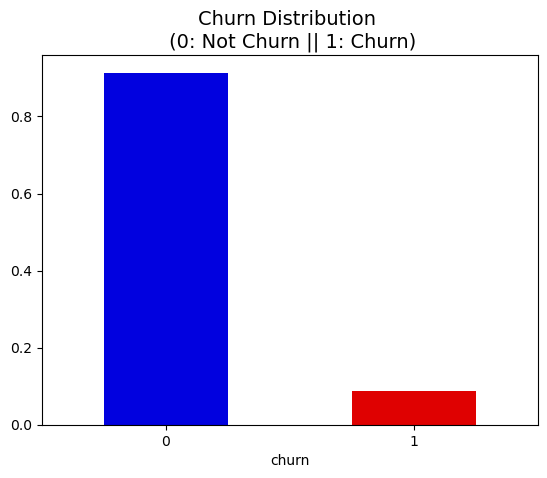

In [65]:
# Plottig a graph to visualize the churn data
colors = ["#0101DF", "#DF0101"]
churn_data['churn'].value_counts(normalize=True).plot(kind='bar', color=colors)
plt.xticks(rotation=0)
plt.title("Churn Distribution \n (0: Not Churn || 1: Churn)", fontsize=14)
plt.show()

***We can sse that 8.6% of people have the churn and the remaning 91% of people have not churned so we can see that the data is Imbalanced.***

Now the ***churn*** is our target variable we can remove all the attributes which all have suffix **'_9'**

In [68]:
# Selecting all the attributes with '_9'

churn_phase_cols = [column for column in churn_data.columns if '_9' in column]
print("the columns with '_9' are: \n", churn_phase_cols)

the columns with '_9' are: 
 ['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [69]:
# Dropping all the columns with '_9'

churn_data.drop(churn_phase_cols, axis=1, inplace=True)

# Checking the shape
churn_data.shape

(30011, 141)

**As we have derived some columns with good phase hence we can drop that columns**

In [71]:
churn_data.drop(['total_rech_amt_data_6','total_rech_amt_data_7','total_rech_data_6',
                'total_rech_data_7','av_rech_amt_data_6','av_rech_amt_data_7'], axis=1, inplace=True)

**Checking for Correlation**

In [73]:
# Create a list of all the months

mon_6_cols = [column for column in churn_data.columns if '_6' in column]
mon_7_cols = [column for column in churn_data.columns if '_7' in column]
mon_8_cols = [column for column in churn_data.columns if '_8' in column]

In [74]:
churn_data.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,churn
7,7.000702e+09,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,3638.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,0.0,1580.0,790.0,1185.0,1
8,7.001525e+09,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19.0,21.0,14.0,437.0,601.0,120.0,90.0,154.0,30.0,50.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,356.0,0.03,0.0,750.95,11.94,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,315.0,21.03,910.65,122.16,0.0,437.0,601.0,519.0,0
13,7.002192e+09,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62

In [75]:
churn_data.columns

Index(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8',
       ...
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g', 'overall_rech_amt_6', 'overall_rech_amt_7',
       'avg_rech_amt_6_7', 'churn'],
      dtype='object', length=135)

In [76]:
corr_col = ['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
            'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
            'offnet_mou_8','total_rech_amt_8','isd_og_mou_8','isd_og_mou_7','sachet_2g_8','total_ic_mou_6',
            'total_ic_mou_8','total_ic_mou_7','std_og_t2t_mou_6','std_og_t2t_mou_8','std_og_t2t_mou_7',
            'std_og_t2m_mou_7','std_og_t2m_mou_8']

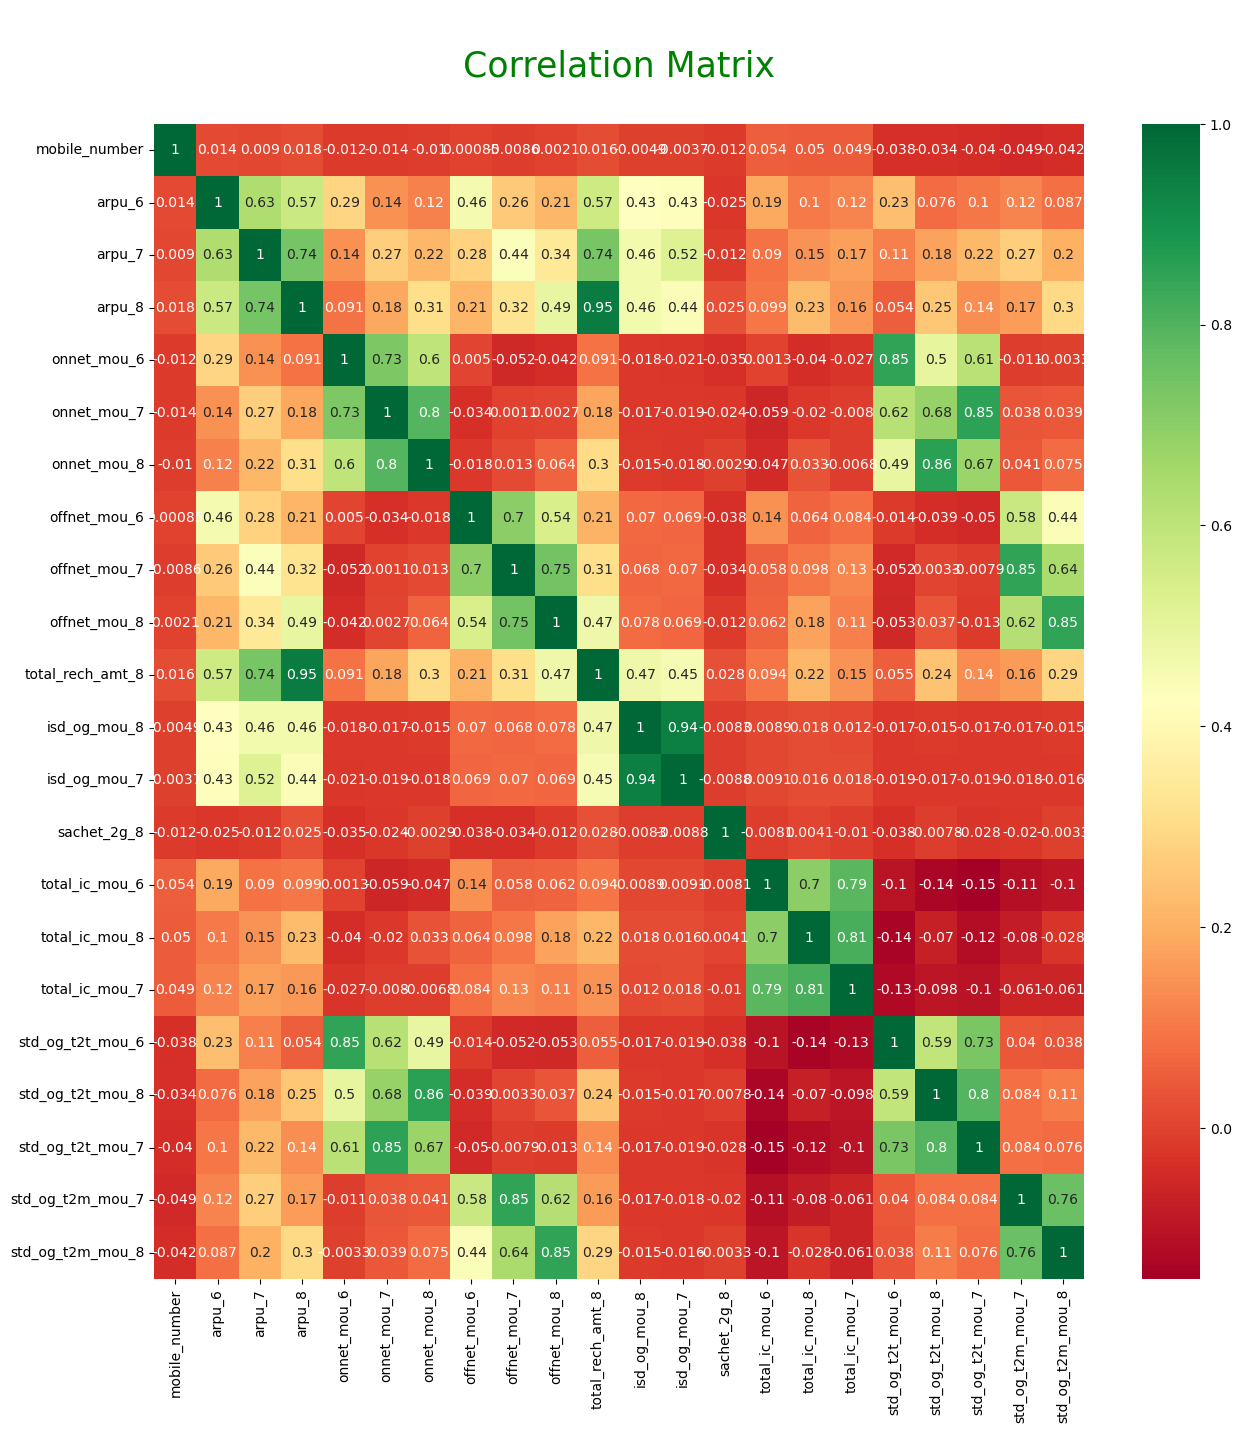

In [77]:
# Checking correlation

fig = plt.figure(figsize=(15,15))
sns.heatmap(churn_data[corr_col].corr(), cmap="RdYlGn", annot=True)
plt.title("\nCorrelation Matrix\n", fontsize = 25, fontweight = 20, color = 'green')
plt.show()

**From the above heatmap we can see that there are few columns who have high correlation for instance, *std_og_t2t_mou_6*, *std_og_t2t_mou_7*, *std_og_t2t_mou_8*, *std_og_t2m_mou_7*, *std_og_t2m_mou_7*, *total_rech_amt_8*, *total_ic_mou_6*, *total_ic_mou_7*, *total_ic_mou_8*, *isd_og_mou_7*, *isd_og_mou_8*.**

In [79]:
# Dropping columns with high correlation values

churn_data.drop(['std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2m_mou_7','std_og_t2m_mou_7',
                 'total_rech_amt_8','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','isd_og_mou_7','isd_og_mou_8'], axis=1, inplace=True)

In [80]:
churn_data.shape

(30011, 125)

## Exploratory Data Analysis

In [82]:
# Creating a new variable 'tenure' and droping 'aon' column


churn_data['tenure'] = (churn_data['aon']/30).round(0)

churn_data.drop('aon', axis=1, inplace=True)

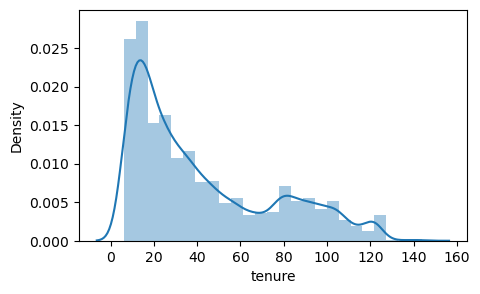

In [83]:
# checking the distribution of tenure 

plt.figure(figsize=(5,3))
sns.distplot(churn_data['tenure'], bins=25)
plt.show()

**From the above graph we can observe that as tenure increases density decreases.**

In [85]:
tn_range = [0,6,12,24,60,64]
tn_label = ['0-6 Months','6-12 Months','1-2 Years','2-5 Years', '5 Years and above']
churn_data['tenure_range'] = pd.cut(churn_data['tenure'], tn_range, labels=tn_label)
churn_data['tenure_range'].head()

7       2-5 Years
8     6-12 Months
13            NaN
16      1-2 Years
17      1-2 Years
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Years' < '2-5 Years' < '5 Years and above']

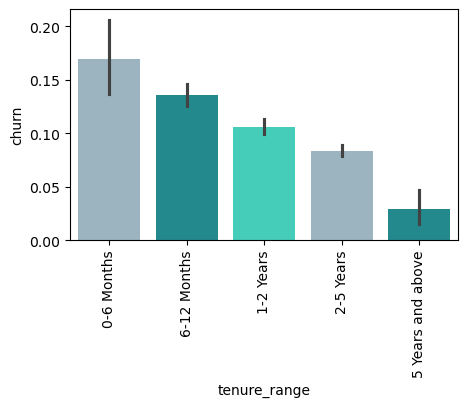

In [86]:
# Plotting a bar graph for tenure

colors = ['#96B6C5','#11999E','#30E3CA']
fig = plt.figure(figsize=(5,3))
sns.barplot(x = 'tenure_range', y = 'churn', data=churn_data, palette=colors)
plt.xticks(rotation=90)
plt.show()

**From the above bar plot we can see that for 0-6 months tenure the churn rate is around 17% follwed by 14% of churn rate for 6-12 months tenure for 1-2 and 2-5 years the tenure range is 11% and 10% respectively. However, the tenure range for 5 years and aboe they have the lowest churn rate of almost 5% respectively.**

In [88]:
churn_data['avg_arpu'] = (churn_data['arpu_6'] + churn_data['arpu_7'])/2
churn_data['avg_arpu'].head()

7     1209.5150
8      435.4720
13     349.2585
16     365.4220
17     354.4940
Name: avg_arpu, dtype: float64

In [89]:
churn_data.drop(['arpu_6','arpu_7'], axis=1, inplace=True)
churn_data.shape

(30011, 125)

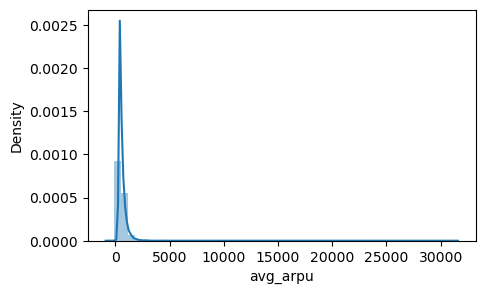

In [90]:
# Visualizing the column created 

plt.figure(figsize=(5,3))
sns.distplot(churn_data['avg_arpu'])
plt.show()

**We can see that the graph shows a left skewed plot as the *average revenue* at 0th level it has high density as for further it does not show any improvement in the plot.**

<Figure size 500x300 with 0 Axes>

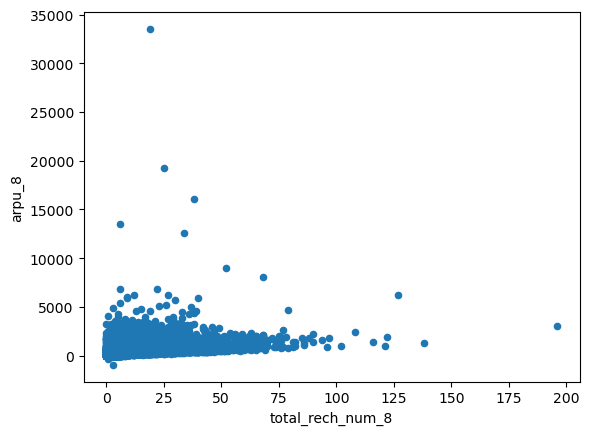

In [92]:
# Drawing a scatter plot between total reacharge and avg revenue

plt.figure(figsize=(5,3))
churn_data[['total_rech_num_8', 'arpu_8']].plot.scatter(x='total_rech_num_8', y='arpu_8')
plt.show()

**From the above scatterplot we can observe that the distribution for *total_rech_num_8* and *arpu_8* is around the lowest point some of the distribution is at the highest.**

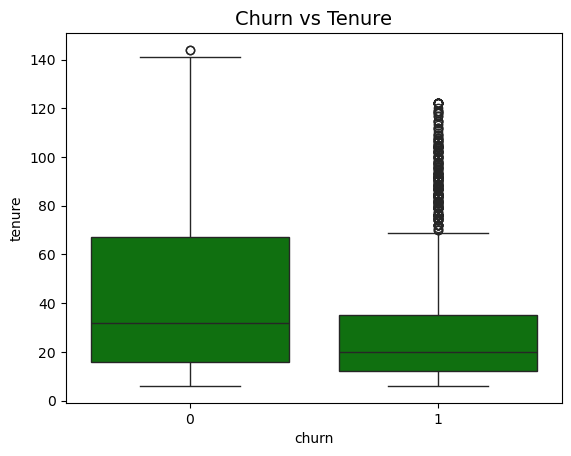

In [94]:
sns.boxplot(x=churn_data.churn, y=churn_data.tenure, color='g')
plt.title("Churn vs Tenure", fontsize=14)
plt.show()

**The boxplt shows us that the 75th percentile for not-churn is at 65% and as for churn's 75th percentile is same as the 50th percetile of the not-churn almost 40%.**

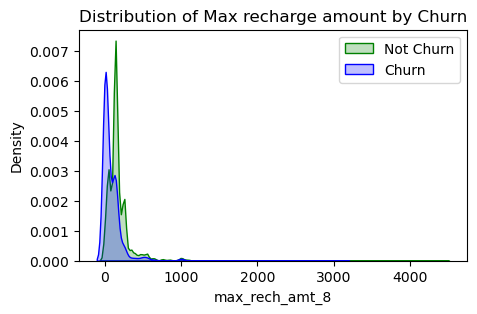

In [96]:
# Plottong churn vs max recharge amount

fig = plt.figure(figsize=(5,3))
ax = sns.kdeplot(churn_data.max_rech_amt_8[(churn_data["churn"]==0)], color="Green", shade=True)
ax = sns.kdeplot(churn_data.max_rech_amt_8[(churn_data["churn"]==1)], ax=ax, color="Blue", shade=True)

ax.legend(["Not Churn", "Churn"], loc = "upper right")
plt.title("Distribution of Max recharge amount by Churn")
plt.show()

In [97]:
# creating a category variable for month 8 column totalrecharge and their count

churn_data['total_rech_data_group_8'] = pd.cut(churn_data['total_rech_data_8'],[-1,0,10,25,100], labels=['No_Recharge',
                                                                                                         '<=10_Recharges','10-25_Rechrages','>25_Recharges'])
churn_data['total_rech_num_group_8'] = pd.cut(churn_data['total_rech_num_8'],[-1,0,10,25,100], labels=['No_Recharge',
                                                                                                         '<=10_Recharges','10-25_Rechrages','>25_Recharges'])

#### Creating Dummy variables

In [99]:
dummy = pd.get_dummies(churn_data[['total_rech_data_group_8', 'total_rech_num_group_8', 'tenure_range']], drop_first=True, dtype=int)
dummy.head()

,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Rechrages,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Rechrages,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Years,tenure_range_2-5 Years,tenure_range_5 Years and above
7,0,0,0,1,0,0,0,0,1,0
8,0,0,0,0,1,0,1,0,0,0
13,0,0,0,0,1,0,0,0,0,0
16,0,0,0,1,0,0,0,1,0,0
17,0,0,0,1,0,0,0,1,0,0


In [100]:
# Merging the original data and dummy data

churn_data = pd.concat([churn_data, dummy], axis=1)
churn_data.head()

,mobile_number,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,churn,tenure,tenure_range,avg_arpu,total_rech_data_group_8,total_rech_num_group_8,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Rechrages,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Rechrages,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Years,tenure_range_2-5 Years,tenure_range_5 Years and above
7,7.000702e+09,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,49.89,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.74,19.38,18.74,0.0,1580.0,790.0,1185.0,1,27.0,2-5 Years,1209.5150,No_Recharge,<=10_Recharges,0,0,0,1,0,0,0,0,1,0
8,7.001525e+09,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,13.69,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19.0,21.0,14.0,437.0,601.0,90.0,154.0,30.0,50.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,356.0,0.03,0.0,750.95,11.94,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,21.03,910.65,122.16,0.0,437.0,601.0,519.0,0,10.0,6-12 Months,435.4720,No_Recharge,10-25_Rechrages,0,0,0,0,1,0,1,0,0,0
13,7.002192e+09,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,255.36,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,1

In [101]:
# Creating a copy of the filtered dataset

df = churn_data[:].copy()

# Dropping unwanted data

df.drop(['total_rech_data_group_8', 'total_rech_num_group_8', 'tenure_range','mobile_number','sep_vbc_3g','tenure'], axis=1, inplace=True)
df.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,churn,avg_arpu,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Rechrages,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Rechrages,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Years,tenure_range_2-5 Years,tenure_range_5 Years and above
7,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,49.89,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.74,19.38,18.74,1580.0,790.0,1185.0,1,1209.5150,0,0,0,1,0,0,0,0,1,0
8,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,13.69,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19.0,21.0,14.0,437.0,601.0,90.0,154.0,30.0,50.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,356.0,0.03,0.0,750.95,11.94,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,21.03,910.65,122.16,437.0,601.0,519.0,0,435.4720,0,0,0,0,1,0,1,0,0,0
13,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,255.36,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6.0,4.0,11.0,507.0,253.0,110.0,110.0,130.0,110.0,50.0,0.0,0

#### Train and Test split 

In [103]:
# Putting the feature variable in X

X = df.drop('churn', axis=1)
X.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,avg_arpu,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Rechrages,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Rechrages,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Years,tenure_range_2-5 Years,tenure_range_5 Years and above
7,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,49.89,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.74,19.38,18.74,1580.0,790.0,1185.0,1209.5150,0,0,0,1,0,0,0,0,1,0
8,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,13.69,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19.0,21.0,14.0,437.0,601.0,90.0,154.0,30.0,50.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,356.0,0.03,0.0,750.95,11.94,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,21.03,910.65,122.16,437.0,601.0,519.0,435.4720,0,0,0,0,1,0,1,0,0,0
13,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,255.36,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6.0,4.0,11.0,507.0,253.0,110.0,110.0,130.0,110.0,50.0,0.0,0.0,0.0,0.0

In [104]:
# Put the target variable in y

y = df.churn
y.head()

7     1
8     0
13    0
16    0
17    0
Name: churn, dtype: int32

In [105]:
# Spliting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### Scaling the features

In [107]:
from sklearn.preprocessing import MinMaxScaler

In [108]:
num_col = X_train.select_dtypes(include=['int64','float64']).columns.tolist()

In [109]:
# Calling scaler function

scaler = MinMaxScaler()

# Scaling and Transforming the data
X_train[num_col] = scaler.fit_transform(X_train[num_col])

In [110]:
X_train.describe()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,avg_arpu,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Rechrages,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Rechrages,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Years,tenure_range_2-5 Years,tenure_range_5 Years and above
count,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.0,21007.0,21007.0,21007.0,21007.0,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.0,21007.0,21007.0,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000
mean,0.073257,0.040364,0.037655,0.025336,0.050104,0.044024,0.027037,0.006994,0.003723,0.003434,0.012885,0.012070,0.006389,0.014786,0.013030,0.008231,0.038574,0.039748,0.034248,0.004836,0.005968,0.007152,0.004466,0.004007,0.005830,0.026743,0.037098,0.02401

#### Handeling the Data Imbalance

In [112]:
# Using SMOTE we will handle the data imbalance

from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42, k_neighbors=5)
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)
len(X_train_smt)

38368

### Logestic Regression Model

In [114]:
import statsmodels.api as sm

In [115]:
# Building a LR model on SMOTE 

X_train_smt = sm.add_constant(X_train_smt)
lreg_1 = sm.GLM(y_train_smt, X_train_smt, family=sm.families.Binomial())
lreg_1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38368
Model:                            GLM   Df Residuals:                    38248
Model Family:                Binomial   Df Model:                          119
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14356.
Date:                Mon, 09 Sep 2024   Deviance:                       28713.
Time:                        14:31:50   Pearson chi2:                 1.87e+11
No. Iterations:                   100   Pseudo R-squ. (CS):             0.4716
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.8598      0.245      3.503      0.000       0.379       1.341
arpu_8                                      1.8398      2.370      0.776      0.438      -2.806       6.486
onnet_mou_6                              -118.2677     26.926     -4.392      0.000    -171.042     -65.493
onnet_mou_7                                40.3295     14.664      2.750      0.006      11.588      69.071
onnet_mou_8                               184.6573     20.745      8.901      0.000     143.998     225.317
offnet_mou_6                             -119.2875     30.329     -3.933      0.000    -178.731     -59.844
offnet_mou_7                               51.3654     17.343      2.962      0.003      17.375      85.356
offnet_mou_8                              192.5124     25.692      7.493      0.000     142.158     242.867
roam_ic_mou_6                              -0.1308      0.786     -0.166      0.868      -1.671       1.410
roam_ic_mou_7                               3.6904      1.343      2.748      0.006       1.058       6.323
roam_ic_mou_8                               0.2469      1.440      0.171      0.864      -2.575       3.069
roam_og_mou_6                              35.7426      8.505      4.202      0.000      19.072      52.413
roam_og_mou_7                              -9.4462      3.383     -2.792      0.005     -16.077      -2.815
roam_og_mou_8                             -50.9927      6.461     -7.893      0.000     -63.656     -38.330
loc_og_t2t_mou_6                        -2181.1493   1.89e+04     -0.115      0.908   -3.92e+04    3.49e+04
loc_og_t2t_mou_7                         5.078e+04   2.14e+04      2.369      0.018    8765.726    9.28e+04
loc_og_t2t_mou_8                         2.814e+05   3.29e+04      8.544      0.000    2.17e+05    3.46e+05
loc_og_t2m_mou_6                        -1617.9677   1.39e+04     -0.116      0.907   -2.89e+04    2.56e+04
loc_og_t2m_mou_7                         3.126e+04   1.32e+04      2.368      0.018    5390.879    5.71e+04
loc_og_t2m_mou_8                         1.299e+05   1.52e+04      8.546      0.000       1e+05     1.6e+05
loc_og_t2f_mou_6                         -494.5845   4308.341     -0.115      0.909   -8938.777    7949.608
loc_og_t2f_mou_7                         8203.0379   3465.580      2.367      0.018    1410.626     1.5e+04
loc_og_t2f_mou_8                         2.431e+04   2844.379      8.546      0.000    1.87e+04    2.99e+04
loc_og_t2c_mou_6                           -1.1625      0.916     -1.269      0.205      -2.958       0.633
loc_og_t2c_mou_7                            2.9984      1.367      2.193      0.028       0.319       5.678
loc_og_t2c_mou_8                           -1.4865      1.0

### Feature Selection Using RFE

In [117]:
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=20)
rfe = rfe.fit(X_train_smt, y_train_smt)

In [118]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train_smt.columns, rfe.support_, rfe.ranking_))

[('const', False, 69),
 ('arpu_8', True, 1),
 ('onnet_mou_6', False, 19),
 ('onnet_mou_7', False, 68),
 ('onnet_mou_8', False, 18),
 ('offnet_mou_6', False, 36),
 ('offnet_mou_7', False, 17),
 ('offnet_mou_8', False, 16),
 ('roam_ic_mou_6', False, 103),
 ('roam_ic_mou_7', False, 64),
 ('roam_ic_mou_8', False, 23),
 ('roam_og_mou_6', False, 95),
 ('roam_og_mou_7', False, 43),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 42),
 ('loc_og_t2t_mou_7', False, 84),
 ('loc_og_t2t_mou_8', False, 15),
 ('loc_og_t2m_mou_6', False, 35),
 ('loc_og_t2m_mou_7', False, 96),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 76),
 ('loc_og_t2f_mou_7', False, 99),
 ('loc_og_t2f_mou_8', False, 20),
 ('loc_og_t2c_mou_6', False, 40),
 ('loc_og_t2c_mou_7', False, 79),
 ('loc_og_t2c_mou_8', False, 80),
 ('loc_og_mou_6', False, 82),
 ('loc_og_mou_7', False, 67),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2m_mou_6', False, 75),
 ('std_og_t2m_mou_8', False, 34),
 ('std_og_t2f_mou_6', False, 70

In [119]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train_smt.columns[rfe.support_]

In [120]:
# Select only the columns selected by RFE

X_train_smt.columns[~rfe.support_]

Index(['const', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8',
       ...
       'total_rech_data_group_8_<=10_Recharges',
       'total_rech_data_group_8_10-25_Rechrages',
       'total_rech_data_group_8_>25_Recharges',
       'total_rech_num_group_8_<=10_Recharges',
       'total_rech_num_group_8_10-25_Rechrages',
       'total_rech_num_group_8_>25_Recharges', 'tenure_range_6-12 Months',
       'tenure_range_1-2 Years', 'tenure_range_2-5 Years',
       'tenure_range_5 Years and above'],
      dtype='object', length=111)

#### Assecing the model using Statsmodel

In [122]:
X_train_sm = sm.add_constant(X_train_smt[col])
lreg_2 = sm.GLM(y_train_smt, X_train_sm, family=sm.families.Binomial())
lreg_2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38368
Model:                            GLM   Df Residuals:                    38347
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16036.
Date:                Mon, 09 Sep 2024   Deviance:                       32071.
Time:                        14:32:16   Pearson chi2:                 7.25e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4233
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5785      0.095      6.085      0.000       0.392       0.765
arpu_8               -16.2350      1.836     -8.845      0.000     -19.833     -12.637
roam_og_mou_8          5.7151      0.563     10.150      0.000       4.611       6.819
loc_og_t2m_mou_8      -0.8225      1.469     -0.560      0.576      -3.703       2.058
loc_og_mou_8          -9.2671      2.420     -3.829      0.000     -14.011      -4.523
std_og_mou_7           7.0158      0.524     13.386      0.000       5.989       8.043
total_og_mou_8       -20.8163      0.978    -21.278      0.000     -22.734     -18.899
loc_ic_t2m_mou_6       8.1586      0.636     12.833      0.000       6.912       9.405
loc_ic_t2m_mou_8     -13.8164      2.249     -6.143      0.000     -18.225      -9.408
loc_ic_t2f_mou_8     -11.0958      1.712     -6.482      0.000     -14.451      -7.741
loc_ic_mou_8         -15.5561      1.607     -9.678      0.000     -18.707     -12.406
std_ic_mou_8         -15.1994      1.446    -10.513      0.000     -18.033     -12.366
spl_ic_mou_8          -4.4138      0.254    -17.404      0.000      -4.911      -3.917
total_rech_num_8      -5.5361      0.482    -11.480      0.000      -6.481      -4.591
last_day_rch_amt_8   -20.6946      0.888    -23.305      0.000     -22.435     -18.954
vol_2g_mb_8           -7.8700      1.326     -5.936      0.000     -10.468      -5.272
monthly_2g_8          -7.8437      0.431    -18.180      0.000      -8.689      -6.998
sachet_2g_8           -8.3669      0.612    -13.681      0.000      -9.566      -7.168
monthly_3g_8          -9.1793      0.529    -17.337      0.000     -10.217      -8.142
overall_rech_amt_6    -1.2375      1.154     -1.073      0.283      -3.499       1.024
avg_arpu              26.7517      1.811     14.769      0.000      23.202      30.302
======================================================================================
"""

In [123]:
# Dropping loc_og_t2m_mou_8 as it has high p-value

col = col.drop('loc_og_t2m_mou_8', 1)
col

Index(['arpu_8', 'roam_og_mou_8', 'loc_og_mou_8', 'std_og_mou_7',
       'total_og_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8',
       'total_rech_num_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8', 'overall_rech_amt_6', 'avg_arpu'],
      dtype='object')

In [124]:
# Refit the model with the new set of features

X_train_sm = sm.add_constant(X_train_smt[col])
lreg_3 = sm.GLM(y_train_smt, X_train_sm, family=sm.families.Binomial())
lreg_3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38368
Model:                            GLM   Df Residuals:                    38348
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16036.
Date:                Mon, 09 Sep 2024   Deviance:                       32072.
Time:                        14:32:17   Pearson chi2:                 6.45e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4233
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5796      0.095      6.091      0.000       0.393       0.766
arpu_8               -16.2835      1.834     -8.877      0.000     -19.879     -12.688
roam_og_mou_8          5.7243      0.563     10.169      0.000       4.621       6.828
loc_og_mou_8         -10.3527      1.467     -7.056      0.000     -13.228      -7.477
std_og_mou_7           7.0174      0.524     13.388      0.000       5.990       8.045
total_og_mou_8       -20.8085      0.978    -21.270      0.000     -22.726     -18.891
loc_ic_t2m_mou_6       8.1444      0.635     12.819      0.000       6.899       9.390
loc_ic_t2m_mou_8     -14.2433      2.112     -6.744      0.000     -18.383     -10.104
loc_ic_t2f_mou_8     -11.1442      1.710     -6.519      0.000     -14.495      -7.794
loc_ic_mou_8         -15.2971      1.535     -9.967      0.000     -18.305     -12.289
std_ic_mou_8         -15.2002      1.446    -10.513      0.000     -18.034     -12.366
spl_ic_mou_8          -4.4139      0.254    -17.404      0.000      -4.911      -3.917
total_rech_num_8      -5.5382      0.482    -11.484      0.000      -6.483      -4.593
last_day_rch_amt_8   -20.7005      0.888    -23.310      0.000     -22.441     -18.960
vol_2g_mb_8           -7.8661      1.326     -5.934      0.000     -10.464      -5.268
monthly_2g_8          -7.8437      0.431    -18.179      0.000      -8.689      -6.998
sachet_2g_8           -8.3663      0.612    -13.680      0.000      -9.565      -7.168
monthly_3g_8          -9.1742      0.529    -17.329      0.000     -10.212      -8.137
overall_rech_amt_6    -1.2486      1.154     -1.082      0.279      -3.509       1.012
avg_arpu              26.7745      1.811     14.784      0.000      23.225      30.324
======================================================================================
"""

In [125]:
# Dropping overall_rech_amt_6 as it has high p-value

col = col.drop('overall_rech_amt_6', 1)
col

Index(['arpu_8', 'roam_og_mou_8', 'loc_og_mou_8', 'std_og_mou_7',
       'total_og_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8',
       'total_rech_num_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8', 'avg_arpu'],
      dtype='object')

In [126]:
# Refit the model with the new set of features

X_train_sm = sm.add_constant(X_train_smt[col])
lreg_4 = sm.GLM(y_train_smt, X_train_sm, family=sm.families.Binomial())
lreg_4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38368
Model:                            GLM   Df Residuals:                    38349
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16036.
Date:                Mon, 09 Sep 2024   Deviance:                       32073.
Time:                        14:32:17   Pearson chi2:                 6.55e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4233
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.6302      0.083      7.585      0.000       0.467       0.793
arpu_8               -15.9264      1.807     -8.812      0.000     -19.469     -12.384
roam_og_mou_8          5.7118      0.563     10.144      0.000       4.608       6.815
loc_og_mou_8         -10.2246      1.462     -6.994      0.000     -13.090      -7.359
std_og_mou_7           7.1512      0.509     14.047      0.000       6.153       8.149
total_og_mou_8       -20.9596      0.968    -21.642      0.000     -22.858     -19.061
loc_ic_t2m_mou_6       8.0844      0.632     12.784      0.000       6.845       9.324
loc_ic_t2m_mou_8     -14.1642      2.110     -6.713      0.000     -18.300     -10.029
loc_ic_t2f_mou_8     -11.0912      1.709     -6.490      0.000     -14.441      -7.742
loc_ic_mou_8         -15.2703      1.534     -9.951      0.000     -18.278     -12.263
std_ic_mou_8         -15.1585      1.445    -10.493      0.000     -17.990     -12.327
spl_ic_mou_8          -4.4291      0.254    -17.470      0.000      -4.926      -3.932
total_rech_num_8      -5.4970      0.481    -11.439      0.000      -6.439      -4.555
last_day_rch_amt_8   -20.6958      0.887    -23.327      0.000     -22.435     -18.957
vol_2g_mb_8           -7.8496      1.325     -5.926      0.000     -10.446      -5.253
monthly_2g_8          -7.8306      0.431    -18.165      0.000      -8.675      -6.986
sachet_2g_8           -8.3618      0.611    -13.681      0.000      -9.560      -7.164
monthly_3g_8          -9.1443      0.528    -17.309      0.000     -10.180      -8.109
avg_arpu              25.2578      1.144     22.069      0.000      23.015      27.501
======================================================================================
"""

In [127]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [128]:
# Checking for the VIF

vif = pd.DataFrame()
vif['Features'] = X_train_smt[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_smt[col].values, i) for i in range(X_train_smt[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,arpu_8,34.86
17,avg_arpu,26.76
8,loc_ic_mou_8,6.86
6,loc_ic_t2m_mou_8,6.73
4,total_og_mou_8,6.04
3,std_og_mou_7,3.80
11,total_rech_num_8,3.36
2,loc_og_mou_8,3.07
5,loc_ic_t2m_mou_6,2.71
12,last_day_rch_amt_8,1.66


In [129]:
# Dropping arpu_8 as it has high VIF value

col = col.drop('arpu_8',1)

In [130]:
# Refit the model with the new set of features

X_train_sm = sm.add_constant(X_train_smt[col])
lreg_5 = sm.GLM(y_train_smt, X_train_sm, family=sm.families.Binomial())
lreg_5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38368
Model:                            GLM   Df Residuals:                    38350
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16078.
Date:                Mon, 09 Sep 2024   Deviance:                       32157.
Time:                        14:32:18   Pearson chi2:                 1.05e+06
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4220
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2820      0.065      4.357      0.000       0.155       0.409
roam_og_mou_8          3.9116      0.515      7.589      0.000       2.901       4.922
loc_og_mou_8          -9.9352      1.465     -6.783      0.000     -12.806      -7.064
std_og_mou_7           8.6453      0.482     17.939      0.000       7.701       9.590
total_og_mou_8       -25.3498      0.841    -30.126      0.000     -26.999     -23.701
loc_ic_t2m_mou_6       8.9305      0.628     14.224      0.000       7.700      10.161
loc_ic_t2m_mou_8     -14.8281      2.127     -6.971      0.000     -18.997     -10.659
loc_ic_t2f_mou_8     -11.3660      1.720     -6.608      0.000     -14.737      -7.995
loc_ic_mou_8         -15.8690      1.550    -10.235      0.000     -18.908     -12.830
std_ic_mou_8         -15.8401      1.455    -10.887      0.000     -18.692     -12.988
spl_ic_mou_8          -4.3889      0.252    -17.406      0.000      -4.883      -3.895
total_rech_num_8      -6.8601      0.459    -14.936      0.000      -7.760      -5.960
last_day_rch_amt_8   -23.0677      0.847    -27.221      0.000     -24.729     -21.407
vol_2g_mb_8           -8.0292      1.325     -6.059      0.000     -10.627      -5.432
monthly_2g_8          -8.1881      0.429    -19.078      0.000      -9.029      -7.347
sachet_2g_8           -8.4083      0.612    -13.741      0.000      -9.608      -7.209
monthly_3g_8         -10.1623      0.512    -19.843      0.000     -11.166      -9.159
avg_arpu              19.0923      0.868     22.002      0.000      17.392      20.793
======================================================================================
"""

In [131]:
# Checking for the VIF

vif = pd.DataFrame()
vif['Features'] = X_train_smt[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_smt[col].values, i) for i in range(X_train_smt[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,loc_ic_mou_8,6.85
5,loc_ic_t2m_mou_8,6.70
3,total_og_mou_8,4.80
16,avg_arpu,4.41
2,std_og_mou_7,3.40
10,total_rech_num_8,3.02
1,loc_og_mou_8,3.01
4,loc_ic_t2m_mou_6,2.68
11,last_day_rch_amt_8,1.56
12,vol_2g_mb_8,1.34


In [132]:
# Dropping loc_ic_t2m_mou_8 it has high VIF value

col = col.drop('loc_ic_t2m_mou_8',1)

In [133]:
# Refit the model with the new set of features

X_train_sm = sm.add_constant(X_train_smt[col])
lreg_6 = sm.GLM(y_train_smt, X_train_sm, family=sm.families.Binomial())
res = lreg_6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38368
Model:                            GLM   Df Residuals:                    38351
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16101.
Date:                Mon, 09 Sep 2024   Deviance:                       32203.
Time:                        14:32:18   Pearson chi2:                 6.71e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4213
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2646      0.065      4.094      0.000       0.138       0.391
roam_og_mou_8          3.9897      0.515      7.741      0.000       2.979       5.000
loc_og_mou_8         -10.4633      1.469     -7.124      0.000     -13.342      -7.585
std_og_mou_7           8.6337      0.483     17.866      0.000       7.687       9.581
total_og_mou_8       -25.4056      0.843    -30.138      0.000     -27.058     -23.753
loc_ic_t2m_mou_6       7.6767      0.583     13.178      0.000       6.535       8.818
loc_ic_t2f_mou_8      -9.1655      1.706     -5.371      0.000     -12.510      -5.821
loc_ic_mou_8         -24.9002      1.011    -24.636      0.000     -26.881     -22.919
std_ic_mou_8         -15.9353      1.460    -10.918      0.000     -18.796     -13.075
spl_ic_mou_8          -4.4050      0.252    -17.454      0.000      -4.900      -3.910
total_rech_num_8      -6.9987      0.459    -15.247      0.000      -7.898      -6.099
last_day_rch_amt_8   -23.2882      0.846    -27.534      0.000     -24.946     -21.630
vol_2g_mb_8           -8.0769      1.325     -6.096      0.000     -10.674      -5.480
monthly_2g_8          -8.1829      0.429    -19.086      0.000      -9.023      -7.343
sachet_2g_8           -8.4258      0.611    -13.796      0.000      -9.623      -7.229
monthly_3g_8         -10.2577      0.513    -20.002      0.000     -11.263      -9.253
avg_arpu              19.4877      0.867     22.475      0.000      17.788      21.187
======================================================================================
"""

In [134]:
# Checking for the VIF

vif = pd.DataFrame()
vif['Features'] = X_train_smt[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_smt[col].values, i) for i in range(X_train_smt[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,total_og_mou_8,4.80
15,avg_arpu,4.39
2,std_og_mou_7,3.40
6,loc_ic_mou_8,3.05
1,loc_og_mou_8,3.01
9,total_rech_num_8,3.01
4,loc_ic_t2m_mou_6,2.31
10,last_day_rch_amt_8,1.56
11,vol_2g_mb_8,1.34
13,sachet_2g_8,1.32


**Now for the model-6 we have p-values and VIFs lower then 0.05 so this is the final model**

In [136]:
# Predicting the values

y_train_smt_pred = res.predict(X_train_sm)
y_train_smt_pred = y_train_smt_pred.values.reshape(-1)
y_train_smt_pred[:10]

array([0.45598925, 0.01409461, 0.23585967, 0.3218806 , 0.21353112,
       0.25417278, 0.57566958, 0.05904044, 0.18710327, 0.06538813])

#### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [138]:
# Creating a df for actual churn and predicted churn values

y_trian_smt_pred_final = pd.DataFrame({'Converted': y_train_smt.values, 'Converted_prob': y_train_smt_pred})
y_trian_smt_pred_final.head()

,Converted,Converted_prob
0,0,0.455989
1,0,0.014095
2,0,0.235860
3,0,0.321881
4,0,0.213531


#### Creating new column Churn_pred with 1 if Churn_Prob > 0.5 else 0

In [140]:
y_trian_smt_pred_final['churn_pred'] = y_trian_smt_pred_final.Converted_prob.map(lambda x: 1 if x>0.5 else 0)
y_trian_smt_pred_final.head()

,Converted,Converted_prob,churn_pred
0,0,0.455989,0
1,0,0.014095,0
2,0,0.235860,0
3,0,0.321881,0
4,0,0.213531,0


In [141]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [142]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_trian_smt_pred_final.Converted, y_trian_smt_pred_final.churn_pred )
print(confusion)

[[15483  3701]
 [ 2927 16257]]


In [143]:
# Predicted     not_churn    churn
# Actual
# not_churn        15661      3627
# churn            2775       16513  

In [144]:
# Let's check the overall accuracy

print('The overall Accuracy is: ',metrics.accuracy_score(y_trian_smt_pred_final.Converted, y_trian_smt_pred_final.churn_pred))

The overall Accuracy is:  0.8272518765638032


In [145]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

TPR = TP/(TP + FN) # true positive rate
TNR = TN/(TN + FP) # true negative rate
FPR = FP/(TN + FP) # false positive rate
FNR = FN/(TP + FN) # false negative rate

print ("True Negatives: ", TN)
print ("False Positves: ", FP)
print ("False Negatives: ",FN)
print ("True Positives: ", TP)

print("              ")

PPV = TP /(TP + FP) # positive predictive value
NPV = TN /(TN + FN) # negative predictive value

print ("Positive Predictive Value: ", PPV)
print ("Negative Predictive Value: ", NPV)

True Negatives:  15483
False Positves:  3701
False Negatives:  2927
True Positives:  16257
              
Positive Predictive Value:  0.8145605772121455
Negative Predictive Value:  0.8410103204780011


In [146]:
# Calculate the sensitivity

sen = TP/float(TP+FN)
print("Sensitivity: ", sen)

Sensitivity:  0.8474249374478732


In [147]:
# Calculate the specificity

spec = TN/float(TN+FP)
print("Specificity: ", spec)

Specificity:  0.8070788156797332


In [148]:
# Calculate the Precision

pres = TP/float(TP+FP)
print("Presicion: ", pres)

Presicion:  0.8145605772121455


#### Finding the Optimal Cutoff

In [150]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [151]:
fpr, tpr, thresholds = metrics.roc_curve( y_trian_smt_pred_final.Converted, 
                                         y_trian_smt_pred_final.Converted_prob, drop_intermediate = False )

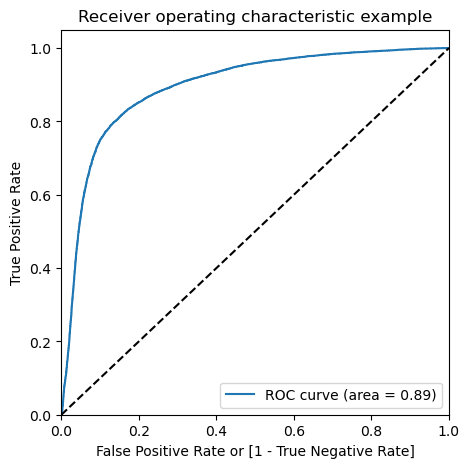

In [152]:
# Call the ROC function

draw_roc(y_trian_smt_pred_final.Converted, y_trian_smt_pred_final.Converted_prob)

In [153]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_trian_smt_pred_final[i]= y_trian_smt_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_trian_smt_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.455989,0,1,1,1,1,1,0,0,0,0,0
1,0,0.014095,0,1,0,0,0,0,0,0,0,0,0
2,0,0.235860,0,1,1,1,0,0,0,0,0,0,0
3,0,0.321881,0,1,1,1,1,0,0,0,0,0,0
4,0,0.213531,0,1,1,1,0,0,0,0,0,0,0


In [154]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at 
# different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_trian_smt_pred_final.Converted, y_trian_smt_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.679394  0.975031  0.383757
0.2   0.2  0.741582  0.953555  0.529608
0.3   0.3  0.779921  0.923634  0.636207
0.4   0.4  0.809398  0.889231  0.729566
0.5   0.5  0.827252  0.847425  0.807079
0.6   0.6  0.831135  0.796393  0.865878
0.7   0.7  0.816331  0.721591  0.911072
0.8   0.8  0.758132  0.569641  0.946622
0.9   0.9  0.581109  0.180776  0.981443


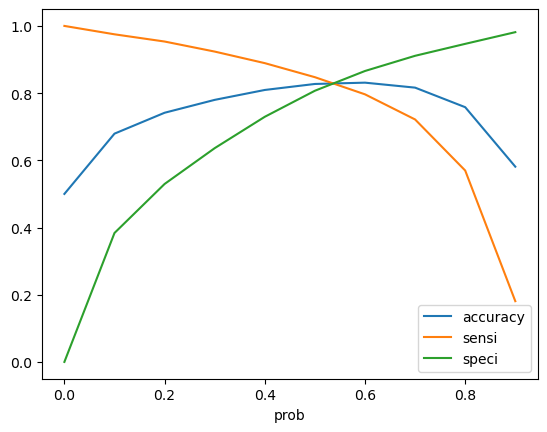

In [155]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

**From the above curve, 0.54 is the optimum cutoff point**

In [157]:
y_trian_smt_pred_final['final_predicted'] = y_trian_smt_pred_final.Converted_prob.map(lambda x: 1 if x>0.54 else 0)
y_trian_smt_pred_final.head(10)

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.455989,0,1,1,1,1,1,0,0,0,0,0,0
1,0,0.014095,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.235860,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.321881,0,1,1,1,1,0,0,0,0,0,0,0
4,0,0.213531,0,1,1,1,0,0,0,0,0,0,0,0
5,0,0.254173,0,1,1,1,0,0,0,0,0,0,0,0
6,0,0.575670,1,1,1,1,1,1,1,0,0,0,0,1
7,0,0.059040,0,1,0,0,0,0,0,0,0,0,0,0
8,0,0.187103,0,1,1,0,0,0,0,0,0,0,0,0
9,0,0.065388,0,1,0,0,0,0,0,0,0,0,0,0


In [158]:
# Let's check the overall accuracy again

print('The overall Accuracy is: ',metrics.accuracy_score(y_trian_smt_pred_final.Converted, y_trian_smt_pred_final.churn_pred))

The overall Accuracy is:  0.8272518765638032


In [159]:
confusion2 = metrics.confusion_matrix(y_trian_smt_pred_final.Converted, y_trian_smt_pred_final.churn_pred )
print(confusion2)

[[15483  3701]
 [ 2927 16257]]


In [160]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

TPR = TP/(TP + FN) # true positive rate
TNR = TN/(TN + FP) # true negative rate
FPR = FP/(TN + FP) # false positive rate
FNR = FN/(TP + FN) # false negative rate

print ("True Negatives: ", TN)
print ("False Positves: ", FP)
print ("False Negatives: ",FN)
print ("True Positives: ", TP)

print("              ")

PPV = TP /(TP + FP) # positive predictive value
NPV = TN /(TN + FN) # negative predictive value

print ("Positive Predictive Value: ", PPV)
print ("Negative Predictive Value: ", NPV)

True Negatives:  15483
False Positves:  3701
False Negatives:  2927
True Positives:  16257
              
Positive Predictive Value:  0.8145605772121455
Negative Predictive Value:  0.8410103204780011


In [161]:
# Calculate the sensitivity

sen = TP/float(TP+FN)
print("Sensitivity: ", sen)

Sensitivity:  0.8474249374478732


In [162]:
# Calculate the specificity

spec = TN/float(TN+FP)
print("Specificity: ", spec)

Specificity:  0.8070788156797332


In [163]:
# Calculate the Precision

pres = TP/float(TP+FP)
print("Presicion: ", pres)

Presicion:  0.8145605772121455


### Precision and recall tradeoff

In [165]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score

In [166]:
y_trian_smt_pred_final.Converted, y_trian_smt_pred_final.churn_pred

(0        0
 1        0
 2        0
 3        0
 4        0
         ..
 38363    1
 38364    1
 38365    1
 38366    1
 38367    1
 Name: Converted, Length: 38368, dtype: int32,
 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 38363    1
 38364    1
 38365    1
 38366    1
 38367    1
 Name: churn_pred, Length: 38368, dtype: int64)

In [167]:
p, r, thresholds = precision_recall_curve(y_trian_smt_pred_final.Converted, y_trian_smt_pred_final.Converted_prob)

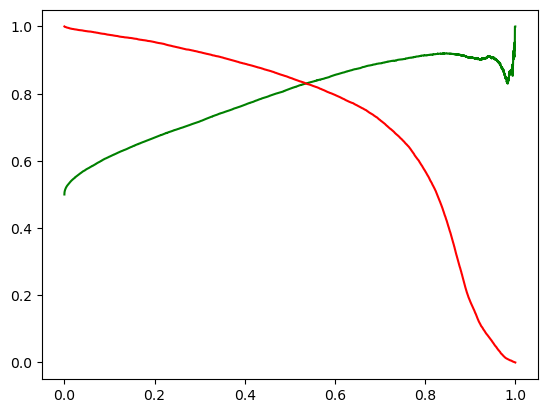

In [168]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making Predictions on Test data

In [170]:
# Scale the test set using 'transform'

X_test[num_col] = scaler.transform(X_test[num_col])
X_test.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,avg_arpu,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Rechrages,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Rechrages,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Years,tenure_range_2-5 Years,tenure_range_5 Years and above
29360,0.046725,0.002934,0.004173,0.000280,0.228487,0.057524,0.000368,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.002564,0.002080,0.000164,0.024407,0.014628,0.000238,0.000887,0.003368,0.000000,0.002625,0.0,0.0,0.012519,0.011217,0.000267,0.215645,0.000246,0.000000,0.0,0.0,0.213233,0.046087,0.000335,0.0,0.004867,0.002062,0.001891,0.040354,0.0,0.0,0.181795,0.052155,0.000731,0.008130,0.013094,0.005453,0.035367,0.038731,0.028963,0.002449,0.012133,0.006553,0.034140,0.041568,0.034612,0.000000,0.000000,0.001290,0.013235,0.009330,0.008008,0.000000,0.000000,0.000000,0.011224,0.004800,0.008524,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.097720,0.075000,0.000000,0.054649,0.018434,0.029925,0.027431,0.000000,0.006733,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.054649,0.018434,0.017082,0.085130,0,0,0,0,0,0,0,1,0,0
49979,0.055420,0.153495,0.164485,0.024132,0.053709,0.034817,0.005089,0.0,0.000134,0.000273,0.0,0.000532,0.001228,0.007454,0.004870,0.003470,0.001148,0.005418,0.000369,0.000000,0.000000,0.000000,0.005425,0.0,0.0,0.005015,0.007914,0.003545,0.048887,0.003915,0.000141,0.0,0.0,0.176791,0.147417,0.019588,0.0,0.036855,0.004867,0.010159,0.000000,0.0,0.0,0.148208,0.147746,0.023295,0.008485,0.000807,0.000057,0.005872,0.008426,0.000288,0.000000,0.000000,0.000000,0.012540,0.006431,0.000327,0.021115,0.014608,0.000587,0.021379,0.037448,0.001927,0.000000,0.001857,0.000000,0.039248,0.032143,0.002251,0.000000,0.0,0.0,0.000772,0.000011,0.0,0.0,0.0,0.000000,0.026059,0.050000,0.020408,0.039297,0.040200,0.042145,0.057107,0.056192,0.042145,0.000000,0.056192,0.0,0.0,0.0,0.0,0.0,0.019749,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.025641,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.039297,0.040200,0.020727,0.089671

In [171]:
X_test = X_test[col]
X_test.head()

,roam_og_mou_8,loc_og_mou_8,std_og_mou_7,total_og_mou_8,loc_ic_t2m_mou_6,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_mou_8,spl_ic_mou_8,total_rech_num_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,avg_arpu
29360,0.000000,0.000267,0.046087,0.000731,0.035367,0.006553,0.034612,0.008524,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.085130
49979,0.001228,0.003545,0.147417,0.023295,0.005872,0.000000,0.000327,0.002251,0.0,0.020408,0.056192,0.000000,0.0,0.0,0.0,0.089671
90612,0.000000,0.003549,0.000000,0.002790,0.044671,0.002222,0.036089,0.000000,0.0,0.030612,0.056642,0.000377,0.0,0.0,0.2,0.072575
87007,0.000000,0.019847,0.003565,0.016199,0.063762,0.003783,0.054156,0.000151,0.0,0.178571,0.006743,0.000000,0.0,0.0,0.0,0.081961
91852,0.000000,0.137065,0.000030,0.107845,0.061427,0.003330,0.030457,0.001608,0.0,0.056122,0.005170,0.000000,0.0,0.0,0.0,0.068429


In [172]:
# Adding a constant to X_test

X_test_sm = sm.add_constant(X_test)

In [173]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(X_test_sm)
y_test_pred.head()

29360    0.819635
49979    0.770375
90612    0.069583
87007    0.263172
91852    0.031315
dtype: float64

In [174]:
y_test_pred = pd.DataFrame(y_test_pred)

# Renaming the column
y_test_pred = y_test_pred.rename(columns={0: 'conversion_prob'})
y_test_pred.head()

,conversion_prob
29360,0.819635
49979,0.770375
90612,0.069583
87007,0.263172
91852,0.031315


In [175]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
29360,0
49979,0
90612,0
87007,0
91852,0


In [176]:
# Concating 'y_test_pred' and 'y_test_df'

y_pred_final = pd.concat([y_test_df,y_test_pred], axis=1)
y_pred_final.head()

,churn,conversion_prob
29360,0,0.819635
49979,0,0.770375
90612,0,0.069583
87007,0,0.263172
91852,0,0.031315


In [177]:
# Make predictions on the test set using 0.54 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.conversion_prob.map(lambda x:1 if x>0.54 else 0)
y_pred_final.head(10)

,churn,conversion_prob,final_predicted
29360,0,0.819635,1
49979,0,0.770375,1
90612,0,0.069583,0
87007,0,0.263172,0
91852,0,0.031315,0
28100,0,0.126764,0
69301,0,0.801520,1
50905,0,0.009332,0
31097,0,0.130075,0
83157,1,0.933172,1


In [178]:
# Let's check the overall accuracy on predited test data.

print("Accuracy for test data :",metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_predicted))

Accuracy for test data : 0.8324078187472235


In [179]:
confusion2 = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.final_predicted )
print(confusion2)

[[6862 1372]
 [ 137  633]]


In [180]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [181]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

TPR = TP/(TP + FN) # true positive rate
TNR = TN/(TN + FP) # true negative rate
FPR = FP/(TN + FP) # false positive rate
FNR = FN/(TP + FN) # false negative rate

print ("True Negatives: ", TN)
print ("False Positves: ", FP)
print ("False Negatives: ",FN)
print ("True Positives: ", TP)

print("              ")

PPV = TP /(TP + FP) # positive predictive value
NPV = TN /(TN + FN) # negative predictive value

print ("Positive Predictive Value: ", PPV)
print ("Negative Predictive Value: ", NPV)

True Negatives:  6862
False Positves:  1372
False Negatives:  137
True Positives:  633
              
Positive Predictive Value:  0.3157107231920199
Negative Predictive Value:  0.9804257751107301


In [182]:
# Calculate the sensitivity

sen = TP/float(TP+FN)
print("Sensitivity for test data: ", sen)

Sensitivity for test data:  0.8220779220779221


In [183]:
# Calculate the specificity

spec = TN/float(TN+FP)
print("Specificity on test data: ", spec)

Specificity on test data:  0.8333738158853534


#### Plotting ROC curve on test data

In [185]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.churn, 
                                         y_pred_final.conversion_prob, drop_intermediate = False )

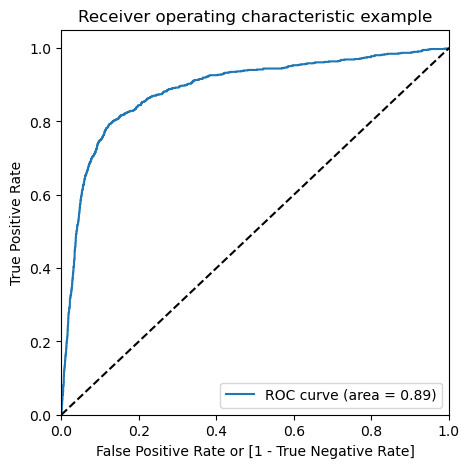

In [186]:
draw_roc(y_pred_final.churn, y_pred_final.conversion_prob)

## PCA

**Logestic Regrassion using PCA**

In [189]:
# splitting the dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

In [190]:
# Scaling the dataset

scaler = MinMaxScaler()

X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

In [191]:
# Applying SMOTE for balancing data Imbalance

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

X_train_smote.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,avg_arpu,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Rechrages,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Rechrages,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Years,tenure_range_2-5 Years,tenure_range_5 Years and above
0,0.060013,0.007186,0.006453,0.004672,0.037790,0.020248,0.005046,0.0,0.0,0.0,0.0,0.0,0.0,0.008700,0.009092,0.007120,0.059703,0.037664,0.008971,0.021548,0.014527,0.033701,0.0,0.0,0.000000,0.059641,0.041350,0.018329,0.000000,0.000000,0.006388,0.008428,0.008531,0.000241,0.000614,0.000323,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.043475,0.021855,0.007643,0.004280,0.007144,0.002945,0.062420,0.043744,0.014967,0.003730,0.000610,0.006541,0.054280,0.036184,0.018802,0.000000,0.000000,0.000000,0.000183,0.000000,0.000000,0.004152,0.001347,0.001979,0.001598,0.000227,0.000731,0.000000,0.0,0.000000,0.000000,0.000000,0.002329,0.000000,0.000000,0.00000,0.019544,0.036232,0.020408,0.022595,0.028536,0.062857,0.063871,0.044504,0.035484,0.041935,0.029220,0.0,0.0,0.0,0.0,0.0,0.119544,0.091743,0.000049,0.000000,0.020358,0.045420,0.25,0.2,0.2,0.0,0.0,0.0,0.000000,0.0000,0.000,0.0,0.0,0.0,0.007807,0.006493,0.000000,0.022595,0.028536,0.006229,0.057596,0,0,0,1,0,0,0,0,1,0
1,0.066897,0.012389,0.026495,0.018769,0.060293,0.031238,0.032065,0.0,0.0,0.0,0.0,0.0,0.0,0.006624,0.006254,0.005268,0.007878,0.008060,0.012015,0.000000,0.000000,0.000000,0.0,0.0,0.001649,0.012616,0.012480,0.015783,0.056040,0.026578,0.000000,0.000000,0.000000,0.061306,0.040705,0.035065,0.000163,0.0,0.0,0.010389,0.0,0.0,0.0,0.070165,0.045589,0.042243,0.024268,0.005601,0.008950,0.032832,0.033695,0.042438,0.000000,0.000383,0.000000,0.044170,0.027932,0.048594,0.001326,0.000635,0.000134,0.001760,0.003547,0.001358,0.000000,0.000000,0.000000,0.002644,0.002270,0.001159,0.029352,0.0,0.040128,0.009191,0.004625,0.021127,0.000171,0.000374,0.00086,0.026059,0.079710,0.061224,0.023568,0.024578,0.034921,0.041935,0.029220,0.000000,0.041935,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0000,0.000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.023568,0.024578,0.004651,0.052323,0,0,0,0,1,0,0,0,0

In [192]:
print(X_train.shape)
print(X_test.shape)
print(X_train_smote.shape)
print(y_train.shape)

(21007, 130)
(9004, 130)
(38374, 130)
(21007,)


In [193]:
# importing PCA

from sklearn.decomposition import PCA

In [194]:
# Applying PCA on train

pca = PCA(random_state=42)

pca.fit(X_train_smote)

PCA(random_state=42)

In [195]:
X_train_smote_pca = pca.fit_transform(X_train_smote)
X_test_pca = pca.transform(X_test)

In [196]:
pca.components_

array([[ 1.12567197e-02,  4.27216971e-03,  1.26510673e-02, ...,
        -2.50067383e-02,  1.60224486e-01, -3.76452756e-03],
       [ 4.77860928e-05,  5.82203681e-04,  3.07550562e-03, ...,
         6.37853934e-01, -7.50957319e-01,  1.05319193e-03],
       [ 4.23222177e-04, -2.68542862e-03, -4.05461581e-03, ...,
        -5.26539023e-01, -3.38027568e-01,  4.17586039e-03],
       ...,
       [ 0.00000000e+00, -2.29132275e-17, -4.67091883e-17, ...,
         6.74422001e-20, -2.29284822e-19, -6.24655726e-19],
       [ 0.00000000e+00, -1.68883013e-17, -3.66478527e-18, ...,
        -1.18767864e-20,  6.78930962e-21,  5.01588226e-20],
       [ 0.00000000e+00, -1.66813772e-15,  2.33826649e-15, ...,
        -2.33702456e-17, -2.89383434e-19, -1.74577345e-17]])

### Applying logistic regression on the data on PCA

In [198]:
logreg_pca = LogisticRegression()

In [199]:
logreg_pca.fit(X_train_smote_pca, y_train_smote)

LogisticRegression()

**Making predictions on test data**

In [201]:
y_pred = logreg_pca.predict(X_test_pca)

In [202]:
# Converting prediction data into a dataframe

y_pred_df = pd.DataFrame(y_pred)

In [203]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [204]:
# Checking for the confusion metrix and accuracy

print("Confusion Metrix: \n", confusion_matrix(y_test,y_pred))
print("")
print("PCA Accuracy: \n", accuracy_score(y_test,y_pred))

Confusion Metrix: 
 [[6815 1416]
 [ 151  622]]

PCA Accuracy: 
 0.8259662372278987


In [205]:
pca.explained_variance_ratio_

array([2.88023517e-01, 2.55472553e-01, 1.91624127e-01, 6.52726258e-02,
       5.02608114e-02, 2.22370077e-02, 1.64852367e-02, 1.45847474e-02,
       8.16641373e-03, 8.03623747e-03, 7.67668095e-03, 7.51944626e-03,
       5.63312526e-03, 4.91599922e-03, 4.17930192e-03, 3.98795973e-03,
       2.90531113e-03, 2.65846078e-03, 2.47976007e-03, 2.38163900e-03,
       2.18831139e-03, 2.03356259e-03, 1.52759570e-03, 1.43176731e-03,
       1.37040786e-03, 1.34436199e-03, 1.28604437e-03, 1.17125975e-03,
       1.13333928e-03, 1.08718873e-03, 1.01871121e-03, 9.32703550e-04,
       9.00435504e-04, 8.48354106e-04, 7.72115908e-04, 7.20451130e-04,
       6.96256753e-04, 6.73216861e-04, 6.40353747e-04, 6.37924401e-04,
       6.10117789e-04, 5.99314366e-04, 5.89642065e-04, 5.57254409e-04,
       5.40840839e-04, 5.11171387e-04, 4.88039493e-04, 4.82803094e-04,
       4.54036338e-04, 4.43518546e-04, 3.93769751e-04, 3.69716517e-04,
       3.51562592e-04, 3.28532715e-04, 3.15567141e-04, 3.06329259e-04,
      

<BarContainer object of 130 artists>

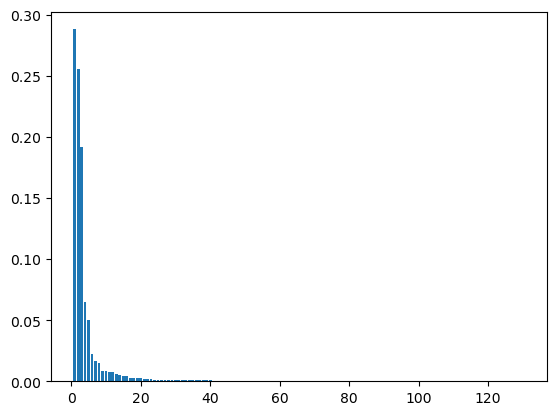

In [206]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

**Making a scree plot**

In [208]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

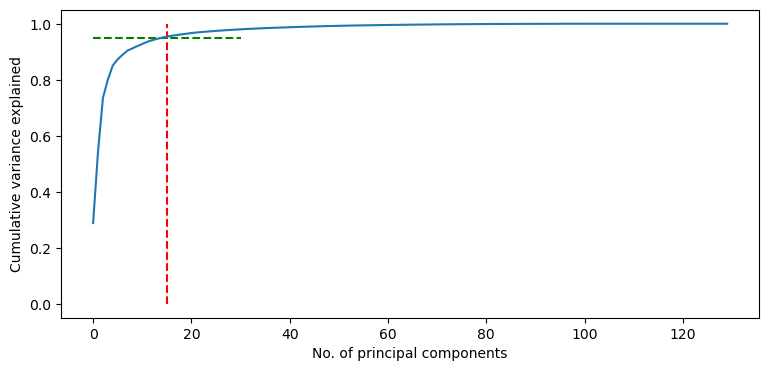

In [209]:
plt.figure(figsize=(9,4))
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.xlabel("No. of principal components")
plt.ylabel("Cumulative variance explained")
plt.show()

In [210]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

array([28.8, 54.3, 73.5, 80. , 85. , 87.2, 88.8, 90.3, 91.1, 91.9, 92.7,
       93.5, 94.1, 94.6, 95. , 95.4, 95.7, 96. , 96.2, 96.4, 96.6, 96.8,
       97. , 97.1, 97.2, 97.3, 97.4, 97.5, 97.6, 97.7, 97.8, 97.9, 98. ,
       98.1, 98.2, 98.3, 98.4, 98.5, 98.6, 98.7, 98.8, 98.9, 99. , 99.1,
       99.2, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3])

**Performing PCA with 15 components**

In [212]:
pca_final = PCA(n_components=15)

In [213]:
train_pca_final = pca_final.fit_transform(X_train_smote)
print(train_pca_final.shape)
test_pca_final = pca_final.transform(X_test)
print(test_pca_final.shape)

(38374, 15)
(9004, 15)


In [214]:
logreg_pca_final = LogisticRegression()
logreg_pca_final = logreg_pca_final.fit(train_pca_final, y_train_smote)

In [215]:
# Making predictions on test data

y_pred = logreg_pca_final.predict(test_pca_final)

In [216]:
# Converting predictions into dataframe

y_pred_df = pd.DataFrame(y_pred)

In [217]:
# Checking again for confusion metrix and accuracy

print("Confusion Metrix: \n", confusion_matrix(y_test,y_pred))
print("")
print("PCA Accuracy: \n", accuracy_score(y_test,y_pred))

Confusion Metrix: 
 [[6301 1930]
 [ 224  549]]

PCA Accuracy: 
 0.760772989782319


# Results

### Train data

**Accuracy: 82.72%**

**Sensitivity: 84.74%**

**Specificity: 80.70%**

### Test Data

**Accuracy: 83.24%**

**Sensitivity: 82.20%**

**Specificity: 83.33%**

**The above model can be considered as a good model as the Accuracy of the model is almost 83%.**

In [228]:
res.params.sort_values(ascending=False)

avg_arpu              19.487691
std_og_mou_7           8.633735
loc_ic_t2m_mou_6       7.676659
roam_og_mou_8          3.989699
const                  0.264580
spl_ic_mou_8          -4.405044
total_rech_num_8      -6.998695
vol_2g_mb_8           -8.076927
monthly_2g_8          -8.182944
sachet_2g_8           -8.425754
loc_ic_t2f_mou_8      -9.165482
monthly_3g_8         -10.257748
loc_og_mou_8         -10.463346
std_ic_mou_8         -15.935261
last_day_rch_amt_8   -23.288221
loc_ic_mou_8         -24.900248
total_og_mou_8       -25.405565
dtype: float64

## Recommendations:

The telecom industries should move with ***avg_arpu*** as the individual users are more likely to get not-churned.

The industry should move with the std calls and local calls ***std_og_mou_7*** and ***loc_ic_t2m_mou_6*** in the month of June and July.

The telecom industry should also move with the romaing network ***roam_og_mou_8*** month of August.

Telecom industry should not move with special incoming calls ***spl_ic_mou_8*** as they are less profitable to the industry.

The industry also should not move with the services which were applied in the month of August for instance, ***loc_ic_t2f_mou_8***, services schemes ***sachet_2g_8***, ***monthly_3g_8***,  ***spl_ic_mou_8***, ***total_rech_num_8*** and so on.